In [2]:
import pandas as pd
from src.topic_eval import (
    topic_in_numbers,
    wordcloud,
    stackplot_topic_by_language,
    stackplot_topic_by_sentiment,
)

df_word_freq = pd.read_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Topics_10/Topics_0/word_freq.csv"
)
df_word_freq = df_word_freq.rename(columns={"Unnamed: 0": "word"})
df_word_freq = df_word_freq[~df_word_freq["word"].isna()]

df_counts = pd.read_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Topics_10/Topics_0/count_agg.csv"
)

df_sentiments = pd.read_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Topics_10/Topics_0/sentiments_agg.csv"
)
df_sentiments = df_sentiments[df_sentiments["sentiment_label"] != "error"]

df_lang = pd.read_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Topics_10/Topics_0/lang_agg.csv"
)

topic = "0"
from collections import Counter


# Counter from dataframe
def get_counters(
    df_freq: pd.DataFrame, topics: list[str] = [str(x) for x in range(10)]
):
    counters = []
    for topic in topics:
        k = Counter()

        def app(x):
            if x[topic] > 0:
                k[x["word"]] += int(x[topic])

        df_freq.apply(app, axis=1)
        counters.append(k)
    return counters


all_counters = get_counters(df_word_freq)

In [3]:
topic_in_numbers("6", df_counts, df_lang, df_sentiments)

Tweets in Topic:  1980250
Of all tweets:     10.83% 
Of which are:
Positive:      6.08%
Neutral:     19.10%
Negativ:     74.82%

Divided in Languages by:
de:      9.66%
en:     68.11%
es:      5.15%
fr:      3.78%
it:      9.74%
ru:      1.86%
uk:      1.70%


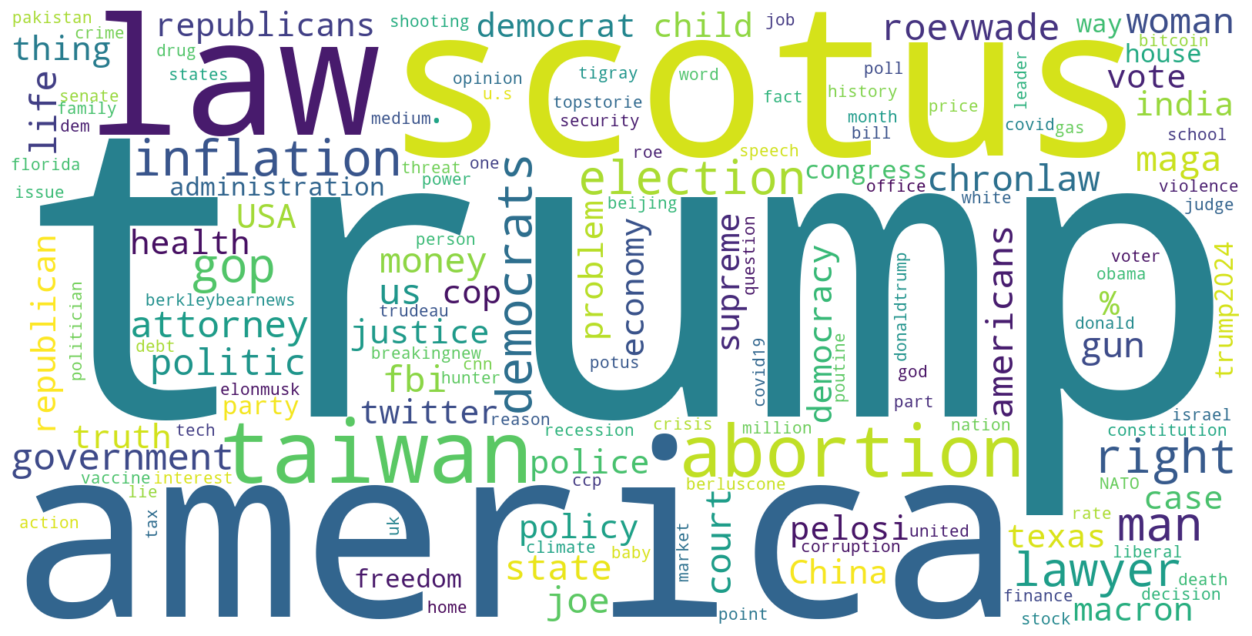

In [5]:
wordcloud(all_counters[6])

/Users/robinfeldmann/TopicAnalysisRUWTweets/src/topic_eval.py:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(index)


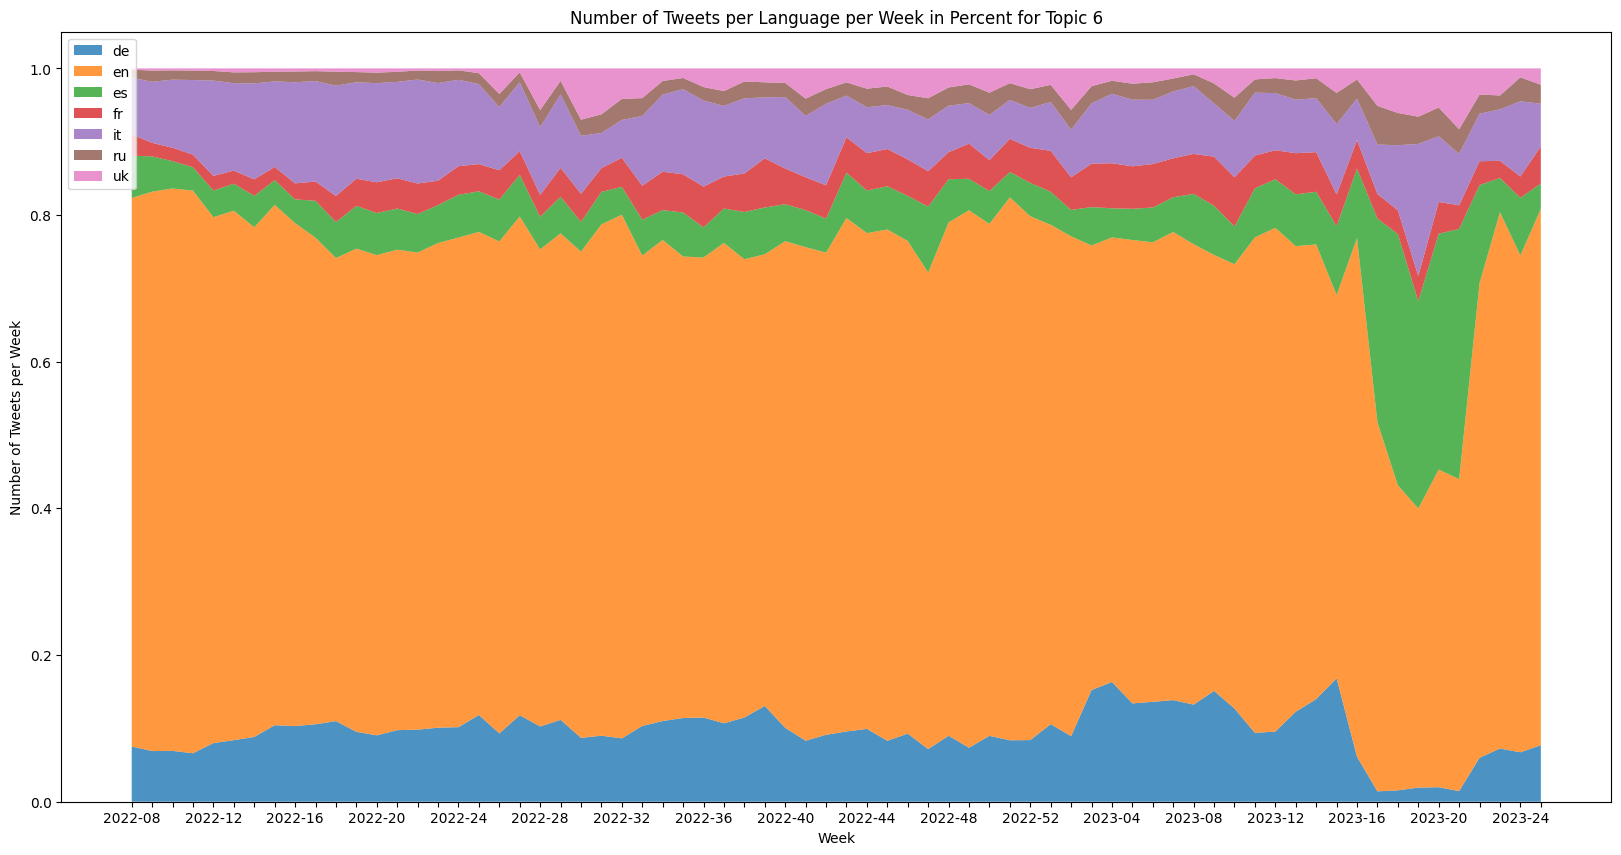

In [10]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.pyplot.rcdefaults()
plt.rcParams["figure.figsize"] = [20, 10]
stackplot_topic_by_language(df_lang, topic="6")

/Users/robinfeldmann/TopicAnalysisRUWTweets/src/topic_eval.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(index)


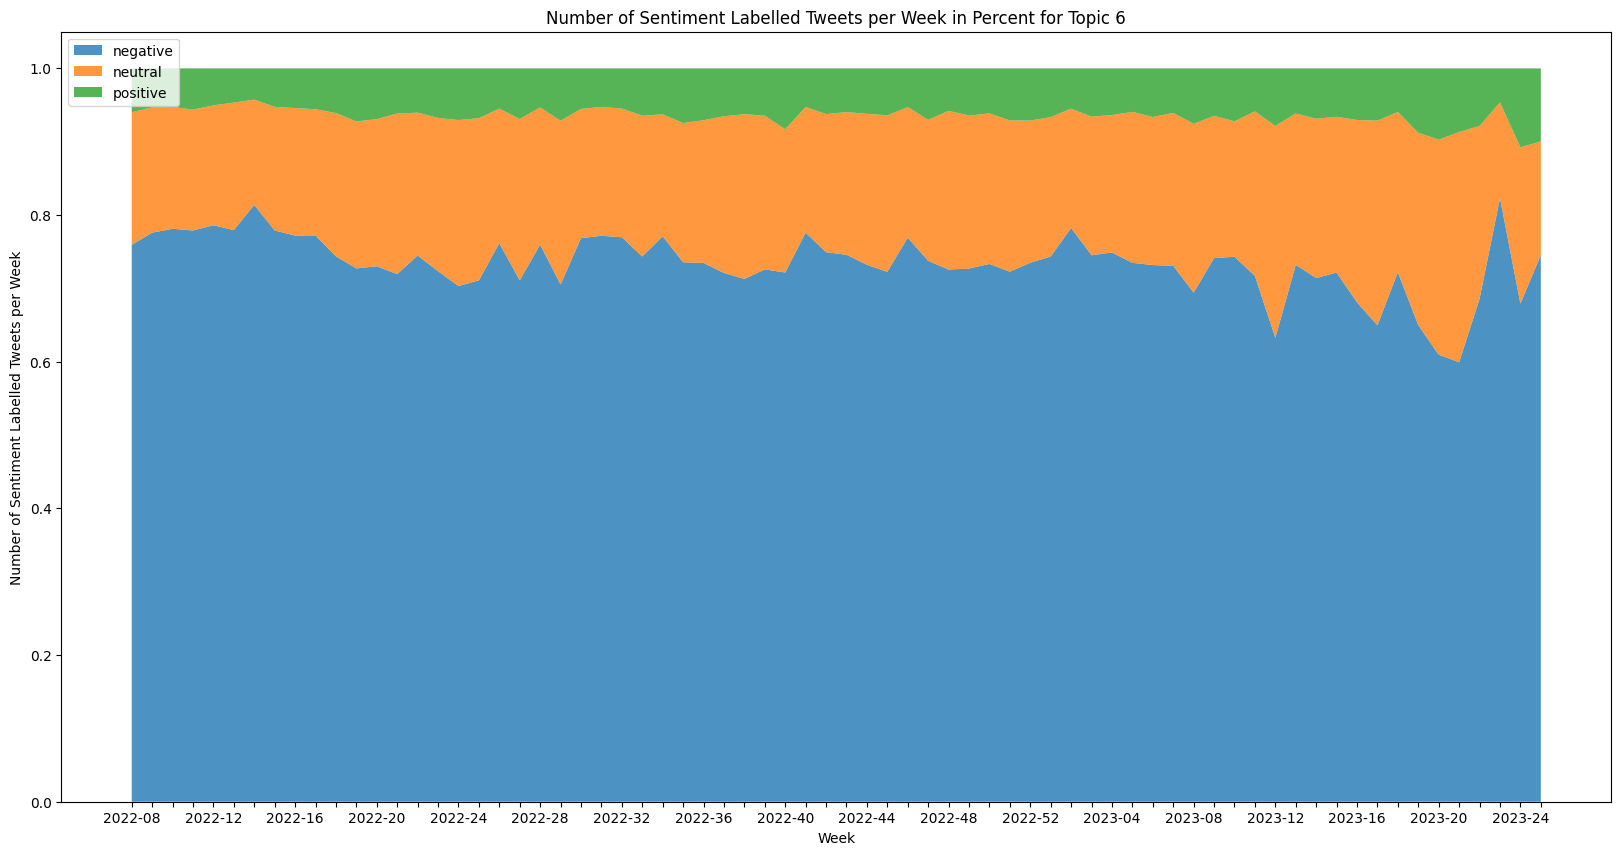

In [11]:
stackplot_topic_by_sentiment(df_sentiments, topic="6")